In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf #importing Yahoo Finance Liberary
from datetime import date, timedelta

import warnings
warnings.filterwarnings("ignore")

### Fetching data from yfinance

In [ ]:
# define the time period for the data
end_date = date.today().strftime("%Y-%m-%d")
start_date = (date.today() - timedelta(days=2225)).strftime("%Y-%m-%d")

tickers = [
    "AAPL", "MSFT", "GOOGL", "AMZN", "META", "NVDA", "TSM", "INTC", "AVGO", "SAP",
    "CSCO", "ORCL", "ADBE", "CRM", "QCOM", "IBM", "ASML", "TSLA"
]

df_original = yf.download(tickers, start=start_date, end=end_date, progress=False)

df_original.reset_index(inplace=True)

df_original.head()

Price        Date      Close                                                \
Ticker                  AAPL        ADBE       AMZN        ASML       AVGO   
0      2019-01-02  37.708595  224.570007  76.956497  147.041672  21.193174   
1      2019-01-03  33.952549  215.699997  75.014000  138.932281  19.308020   
2      2019-01-04  35.401955  226.190002  78.769501  144.943771  19.497786   
3      2019-01-07  35.323158  229.259995  81.475502  148.255234  19.894882   
4      2019-01-08  35.996517  232.679993  82.829002  147.163940  19.735210   

Price                                                ...   Volume            \
Ticker         CRM       CSCO      GOOGL        IBM  ...      IBM      INTC   
0       134.797104  35.501102  52.543530  83.291336  ...  4434935  18774600   
1       129.675690  34.209995  51.088299  81.628540  ...  4546648  32267300   
2       137.193710  35.750992  53.708801  84.816757  ...  4683779  35447300   
3       141.430054  35.992542  53.601688  85.416801  ...  3923755  22736800   
4       144.910614  36.284088  54.072483  86.631378  ...  4982726  22749200   

Price                                                                          \
Ticker      META      MSFT       NVDA      ORCL      QCOM      SAP       TSLA   
0       28146200  35329300  508752000  14320400   9896600   506300  174879000   
1       22717900  42579100  705552000  19868700  14422200   807800  104478000   
2       29002100  44060600  585620000  20984000  14177300  1038100  110911500   
3       20089300  35656100  709160000  17967900  12352000   861600  113268000   
4       26263800  31514400  786016000  16255700  12110000   548600  105127500   

Price             
Ticker       TSM  
0        5273100  
1       15998000  
2       14178200  
3        6850800  
4       11462600  

[5 rows x 91 columns]

In [96]:
list(df_original.columns)

[('Date', ''),
 ('Close', 'AAPL'),
 ('Close', 'ADBE'),
 ('Close', 'AMZN'),
 ('Close', 'ASML'),
 ('Close', 'AVGO'),
 ('Close', 'CRM'),
 ('Close', 'CSCO'),
 ('Close', 'GOOGL'),
 ('Close', 'IBM'),
 ('Close', 'INTC'),
 ('Close', 'META'),
 ('Close', 'MSFT'),
 ('Close', 'NVDA'),
 ('Close', 'ORCL'),
 ('Close', 'QCOM'),
 ('Close', 'SAP'),
 ('Close', 'TSLA'),
 ('Close', 'TSM'),
 ('High', 'AAPL'),
 ('High', 'ADBE'),
 ('High', 'AMZN'),
 ('High', 'ASML'),
 ('High', 'AVGO'),
 ('High', 'CRM'),
 ('High', 'CSCO'),
 ('High', 'GOOGL'),
 ('High', 'IBM'),
 ('High', 'INTC'),
 ('High', 'META'),
 ('High', 'MSFT'),
 ('High', 'NVDA'),
 ('High', 'ORCL'),
 ('High', 'QCOM'),
 ('High', 'SAP'),
 ('High', 'TSLA'),
 ('High', 'TSM'),
 ('Low', 'AAPL'),
 ('Low', 'ADBE'),
 ('Low', 'AMZN'),
 ('Low', 'ASML'),
 ('Low', 'AVGO'),
 ('Low', 'CRM'),
 ('Low', 'CSCO'),
 ('Low', 'GOOGL'),
 ('Low', 'IBM'),
 ('Low', 'INTC'),
 ('Low', 'META'),
 ('Low', 'MSFT'),
 ('Low', 'NVDA'),
 ('Low', 'ORCL'),
 ('Low', 'QCOM'),
 ('Low', 'SAP'),
 ('

In [97]:
#Create a list of columns to melt
columns_to_melt = [('Close', 'AAPL'), ('Close', 'ADBE'), ('Close', 'AMZN'), ('Close', 'ASML'), ('Close', 'AVGO'), ('Close', 'CRM'),
 ('Close', 'CSCO'), ('Close', 'GOOGL'), ('Close', 'IBM'), ('Close', 'INTC'), ('Close', 'META'), ('Close', 'MSFT'), ('Close', 'NVDA'), ('Close', 'ORCL'),
 ('Close', 'QCOM'), ('Close', 'SAP'), ('Close', 'TSLA'), ('Close', 'TSM'), ('High', 'AAPL'), ('High', 'ADBE'), ('High', 'AMZN'),
 ('High', 'ASML'), ('High', 'AVGO'), ('High', 'CRM'), ('High', 'CSCO'), ('High', 'GOOGL'), ('High', 'IBM'), ('High', 'INTC'), ('High', 'META'),
 ('High', 'MSFT'), ('High', 'NVDA'), ('High', 'ORCL'), ('High', 'QCOM'), ('High', 'SAP'), ('High', 'TSLA'), ('High', 'TSM'), ('Low', 'AAPL'),
 ('Low', 'ADBE'), ('Low', 'AMZN'), ('Low', 'ASML'), ('Low', 'AVGO'), ('Low', 'CRM'), ('Low', 'CSCO'), ('Low', 'GOOGL'), ('Low', 'IBM'),
 ('Low', 'INTC'), ('Low', 'META'), ('Low', 'MSFT'), ('Low', 'NVDA'), ('Low', 'ORCL'), ('Low', 'QCOM'), ('Low', 'SAP'), 
 ('Low', 'TSLA'), ('Low', 'TSM'), ('Open', 'AAPL'), ('Open', 'ADBE'), ('Open', 'AMZN'), ('Open', 'ASML'), ('Open', 'AVGO'), ('Open', 'CRM'),
 ('Open', 'CSCO'), ('Open', 'GOOGL'), ('Open', 'IBM'), ('Open', 'INTC'), ('Open', 'META'), ('Open', 'MSFT'), ('Open', 'NVDA'), ('Open', 'ORCL'),
 ('Open', 'QCOM'), ('Open', 'SAP'), ('Open', 'TSLA'), ('Open', 'TSM'), ('Volume', 'AAPL'), ('Volume', 'ADBE'), ('Volume', 'AMZN'),
 ('Volume', 'ASML'), ('Volume', 'AVGO'), ('Volume', 'CRM'), ('Volume', 'CSCO'), ('Volume', 'GOOGL'), ('Volume', 'IBM'), ('Volume', 'INTC'),
 ('Volume', 'META'), ('Volume', 'MSFT'), ('Volume', 'NVDA'), ('Volume', 'ORCL'), ('Volume', 'QCOM'), ('Volume', 'SAP'), ('Volume', 'TSLA'), ('Volume', 'TSM')
]

# Create an empty DataFrame to store the melted data
df = pd.DataFrame()

# Iterate through the columns and append to the melted DataFrame
for col in columns_to_melt:
    temp_df = df_original[[('Date', ''), col]].copy()
    temp_df.columns = ['Date', 'Value']
    temp_df['Price'] = col[0]
    temp_df['Ticker'] = col[1]
    df = pd.concat([df, temp_df], ignore_index=True)

df.head(20)

,Date,Value,Price,Ticker
0,2019-01-02,37.708595,Close,AAPL
1,2019-01-03,33.952549,Close,AAPL
2,2019-01-04,35.401955,Close,AAPL
3,2019-01-07,35.323158,Close,AAPL
4,2019-01-08,35.996517,Close,AAPL
5,2019-01-09,36.607807,Close,AAPL
6,2019-01-10,36.724815,Close,AAPL
7,2019-01-11,36.364250,Close,AAPL
8,2019-01-14,35.817440,Close,AAPL
9,2019-01-15,36.550503,Close,AAPL


In [98]:
df_reshaped = df.pivot_table(index=['Date', 'Ticker'], columns='Price', values='Value', aggfunc='first').reset_index()
df_reshaped.head()

Price,Date,Ticker,Close,High,Low,Open,Volume
0,2019-01-02,AAPL,37.708595,37.930665,36.827486,36.985083,148158800.0
1,2019-01-02,ADBE,224.570007,226.169998,219.000000,219.910004,2784100.0
2,2019-01-02,AMZN,76.956497,77.667999,73.046501,73.260002,159662000.0
3,2019-01-02,ASML,147.041672,147.935396,144.727382,145.141321,602500.0
4,2019-01-02,AVGO,21.193174,21.292657,20.606310,20.803604,30346000.0


In [99]:
df_reshaped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27540 entries, 0 to 27539
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    27540 non-null  datetime64[ns]
 1   Ticker  27540 non-null  object        
 2   Close   27540 non-null  float64       
 3   High    27540 non-null  float64       
 4   Low     27540 non-null  float64       
 5   Open    27540 non-null  float64       
 6   Volume  27540 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 1.5+ MB


In [100]:
df_save = df_reshaped.to_csv('stock_analysis.csv')

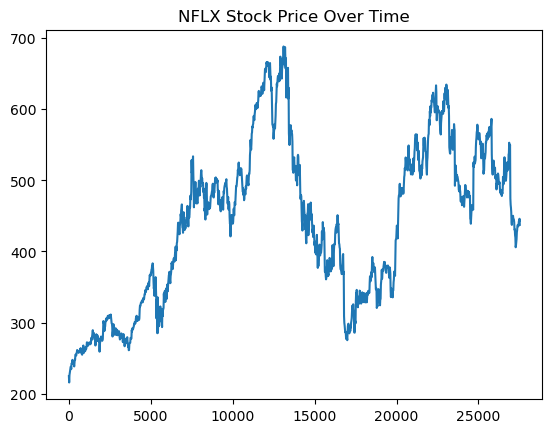

In [101]:
# Plot price data for a specific ticker
plt.plot(df_reshaped[df_reshaped['Ticker'].isin(['ADBE',])]['Close'], )
plt.title('NFLX Stock Price Over Time')
plt.show()

In [113]:
Ticker_prices = df_reshaped.groupby('Ticker')['Close'].mean().reset_index()

ticker_prices = Ticker_prices.sort_values(by='Close', ascending=False)


,Ticker,Close
3,ASML,549.351326
1,ADBE,440.254987
10,META,285.112178
11,MSFT,263.723074
5,CRM,211.702027


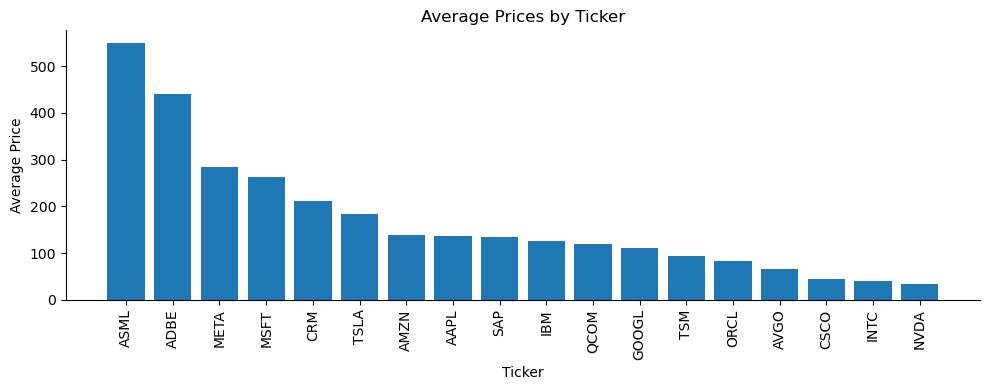

In [103]:
#Ticker_prices = df_reshaped.groupby('Ticker')['Close'].mean().reset_index()

plt.figure(figsize=(10, 4))
plt.bar(range(len(ticker_prices['Ticker'])), ticker_prices['Close'])
plt.xlabel('Ticker')
plt.ylabel('Average Price')
plt.title('Average Prices by Ticker')
plt.xticks(range(len(ticker_prices['Ticker'])), ticker_prices['Ticker'], rotation=90)

sns.despine()
plt.tight_layout()
plt.show()

In [114]:
top_5 = df_reshaped.sort_values(by=['Ticker','Close'], ascending=False)
top_5.head()

Price,Date,Ticker,Close,High,Low,Open,Volume
27431,2025-01-23,TSM,224.619995,224.699997,219.410004,220.100006,8986800.0
27413,2025-01-22,TSM,223.199997,225.429993,219.309998,221.949997,17294500.0
27449,2025-01-24,TSM,221.880005,226.399994,220.960007,226.220001,13183800.0
27233,2025-01-06,TSM,220.009995,222.199997,215.690002,218.770004,24339900.0
27395,2025-01-21,TSM,218.699997,220.149994,212.050003,214.460007,19061300.0


<Axes: xlabel='Date', ylabel='Close'>

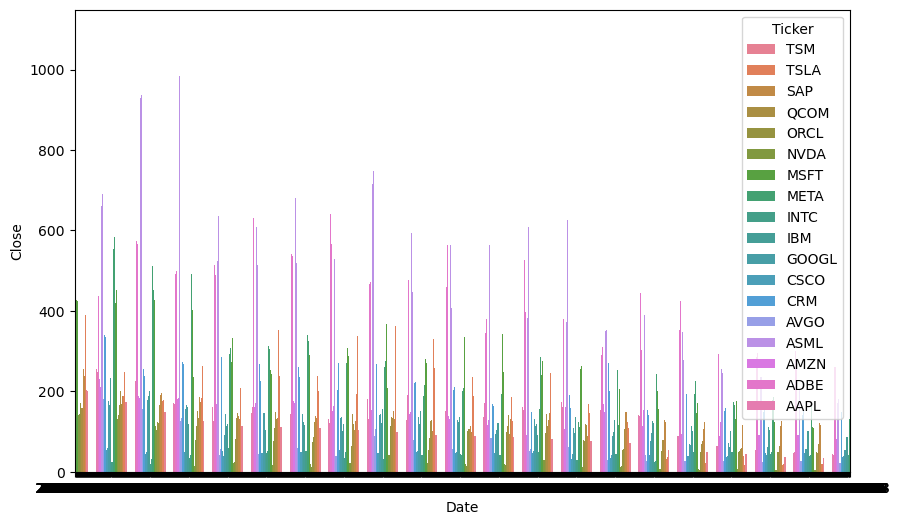

In [116]:
plt.figure(figsize=(10, 6))

sns.barplot(data=top_5, x='Date', y='Close', hue='Ticker')